In [1]:
# Set the project root directory
import sys, os
sys.path.insert(0, os.path.abspath(".."))
from init_env import set_project_root
project_root = set_project_root()

# Imports
import numpy as np
import functionsConst as functions
from optSolver import optSolverConst as optSolver
from framework import Method, Options

import scipy.io
import matplotlib.pyplot as plt


# Define three class objects required in 'optSolver' and their attributes 

class Problem:
    def __init__(self, name, x0):
        self.name = name
        self.x0 = x0
        self.n = len(x0)
        match name:
            case "P1":
                self.compute_f = functions.p1_func
                self.compute_g = functions.p1_grad
                self.compute_H = functions.p1_Hess
                self.compute_const = functions.p1_c
                self.compute_const_g = functions.p1_jac_c
                self.compute_const_H = functions.p1_Hess_c
            case "P2":
                self.compute_f = functions.p2_func
                self.compute_g = functions.p2_grad
                self.compute_H = functions.p2_Hess
                self.compute_const = functions.p2_c
                self.compute_const_g = functions.p2_jac_c
                self.compute_const_H = functions.p2_Hess_c

            case _:
                raise ValueError("problem not defined!!!")

def plotXGap(problem_name, x_star, history):
    import matplotlib.pyplot as plt
    import numpy as np

    X = np.array(history["x"])                  # (iters, n)
    gaps = np.linalg.norm(X - x_star, axis=1)   # per‐iterate gap

    plt.figure()
    plt.plot(gaps)
    plt.xlabel('Iteration')
    plt.ylabel(r'$\|x - x^*\|$')
    plt.title(f'{problem_name}: x Optimality Gap')
    plt.grid()
    plt.show()


def plotNormGradLag(problem_name, history):
    plt.figure()
    plt.plot(history['norm_g_lag'])
    plt.xlabel('Iterations')
    plt.ylabel("||∇L||")
    plt.title(f'{problem_name}: Norm of gradient of Lagrangian vs Iterations')
    plt.grid() 

def plotNormC(problem_name, history):
    plt.figure()
    plt.plot(history['norm_c'])
    plt.xlabel('Iterations')
    plt.ylabel("||c(x)||")
    plt.title(f'{problem_name}: Norm of Constraints vs Iterations')
    plt.grid() 

def plotF(problem_name, history):
    plt.figure()
    plt.plot(history['f'])
    plt.xlabel('Iterations')
    plt.ylabel("f(x)")
    plt.title(f'{problem_name}: f(x) vs Iterations')
    plt.grid()


In [2]:
p1 = Problem("P1", np.array([2, 2]))
f_star_p1 = np.array([-1, -1])
p2 = Problem("P2", np.array([-1.8, 1.7, 1.9, -0.8, -0.8]))
f_star_p2 = np.array([-1.71, 1.59, 1.82, -0.763, -0.763])

method = Method("QuadraticPenalty")
options = Options(term_tol=1e-5, max_iterations=1e3)

nu final: 10000.0
average inner iterations: 1.3333333333333333


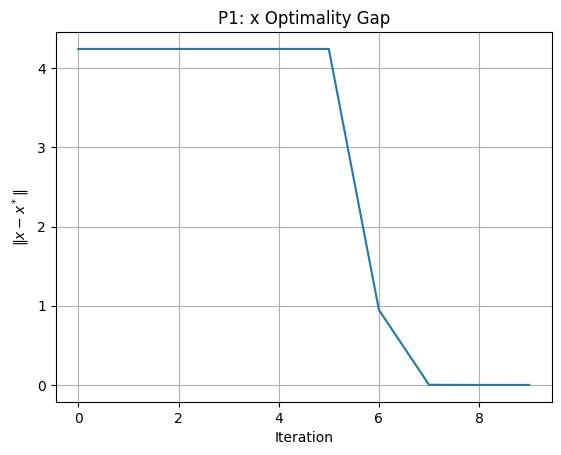

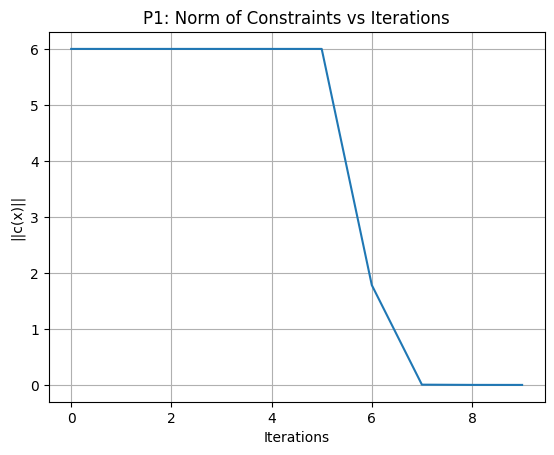

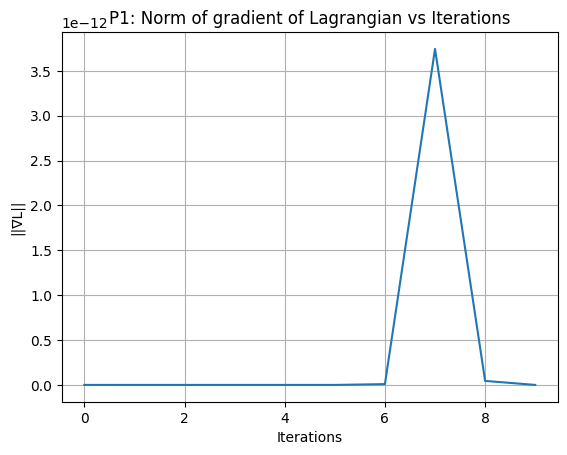

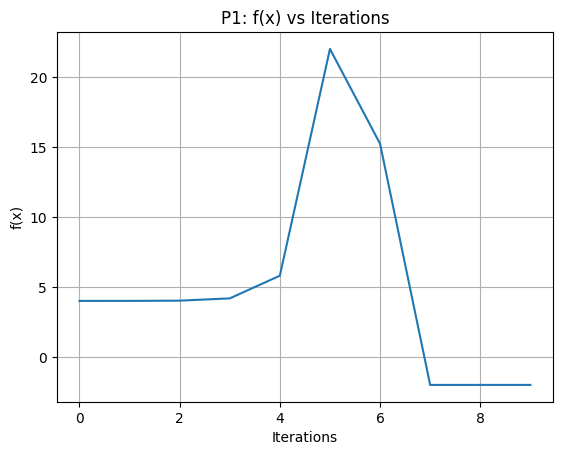

In [3]:
x, f, norm_c, hist = optSolver(p1, method, options)
print(f"nu final: {hist['nu']}")
print(f"average inner iterations: {hist['avg_inner_iters']}")
plotXGap("P1", f_star_p1, hist)
plotNormC("P1", hist)
plotNormGradLag("P1", hist)
plotF("P1", hist)

nu final: 10000.0
average inner iterations: 6.777777777777778


c:\Users\hvand\OneDrive - Umich\Documents\UMICH\W25\Math 562\optiMaizer\functionsConst.py:50: RuntimeWarning: overflow encountered in exp
  return np.exp(p) - 0.5 * g**2


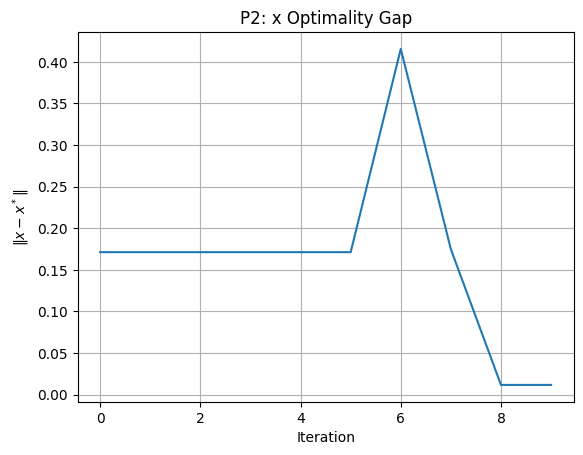

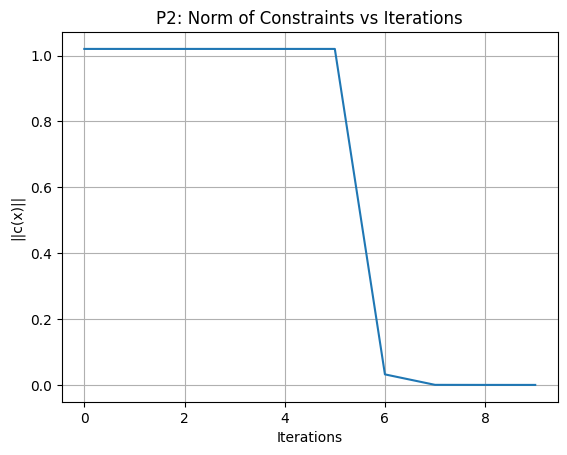

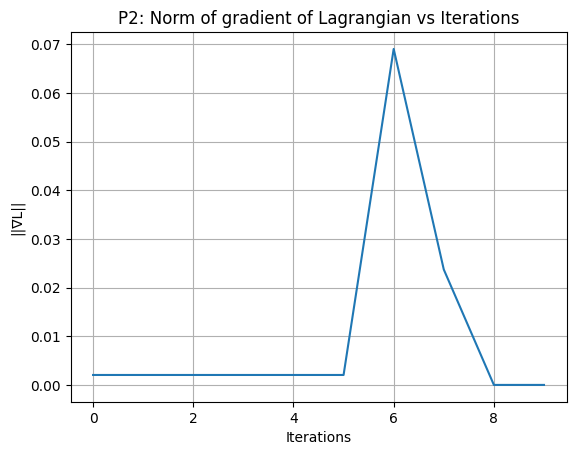

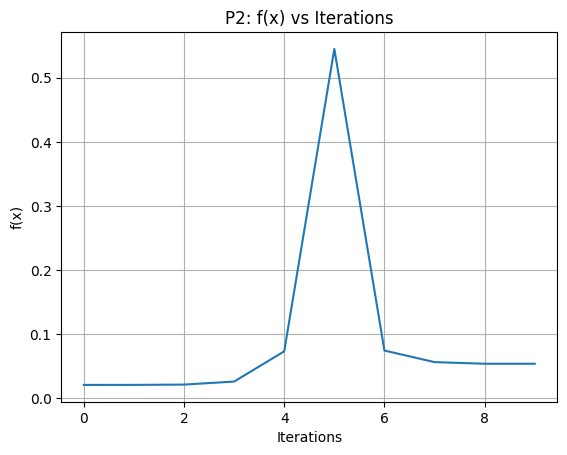

In [4]:
x, f, norm_c, hist = optSolver(p2, method, options)
print(f"nu final: {hist['nu']}")
print(f"average inner iterations: {hist['avg_inner_iters']}")
plotXGap("P2", f_star_p2, hist)
plotNormC("P2", hist)
plotNormGradLag("P2", hist)
plotF("P2", hist)